In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load your dataset (Avg Hourly Wages)
data = pd.read_csv('D:\\OneDrive (Personal)\\OneDrive\\~ TMU 2023\\CIND 820 - Big Data Analytics Project\\05 - Literature Review, Data Description, and Approach (25%)\\Data\\Wages - (Full-Time & Avg Hourly).csv')

# Check the first five records
first_five_records_hr = data.head()

print('First Five Records\n', first_five_records_hr)

First Five Records
   REF_DATE                        GEO        DGUID                     Wages  \
0  1997-01  Newfoundland and Labrador  2016A000210  Average hourly wage rate   
1  1997-02  Newfoundland and Labrador  2016A000210  Average hourly wage rate   
2  1997-03  Newfoundland and Labrador  2016A000210  Average hourly wage rate   
3  1997-04  Newfoundland and Labrador  2016A000210  Average hourly wage rate   
4  1997-05  Newfoundland and Labrador  2016A000210  Average hourly wage rate   

          Type of work         National Occupational Classification (NOC)  \
0  Full-time employees  Legislative and senior management occupations ...   
1  Full-time employees  Legislative and senior management occupations ...   
2  Full-time employees  Legislative and senior management occupations ...   
3  Full-time employees  Legislative and senior management occupations ...   
4  Full-time employees  Legislative and senior management occupations ...   

     Sex       Age group            

In [3]:
# Drop unnecessary columns
columns_to_drop = ['DGUID', 'UOM_ID', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']
data_wage = data.drop(columns=columns_to_drop)

# Separating the 'National Occupational Classification (NOC)' into two columns
data_wage[['occupation_classification', 'NOC']] = data_wage['National Occupational Classification (NOC)'].str.extract(r'([^\[]+)\s*\[([^\]]+)\]')
data_wage = data_wage.drop(columns=['National Occupational Classification (NOC)'])

# Ensure new columns are properly formatted
data_wage['occupation_classification'] = data_wage['occupation_classification'].str.strip().astype('category')
data_wage['NOC'] = data_wage['NOC'].str.strip()

# Standardizing Data Formats
categorical_columns = ['GEO', 'Wages', 'Type of work', 'Sex', 'Age group', 'occupation_classification']
for column in categorical_columns:
    data_wage[column] = data_wage[column].astype(str).str.lower()

# Convert 'REF_DATE' to datetime format
data_wage['REF_DATE'] = pd.to_datetime(data_wage['REF_DATE'], format='%Y-%m')

# Ensure all categorical variables are type 'category'
for column in categorical_columns:
    data_wage[column] = data_wage[column].astype('category')

# Ensure 'VALUE' is numeric
data_wage['VALUE'] = pd.to_numeric(data_wage['VALUE'], errors='coerce')

C:\Users\nesha\AppData\Local\Temp\ipykernel_21200\4225235963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_wage, y='VALUE', palette='viridis')


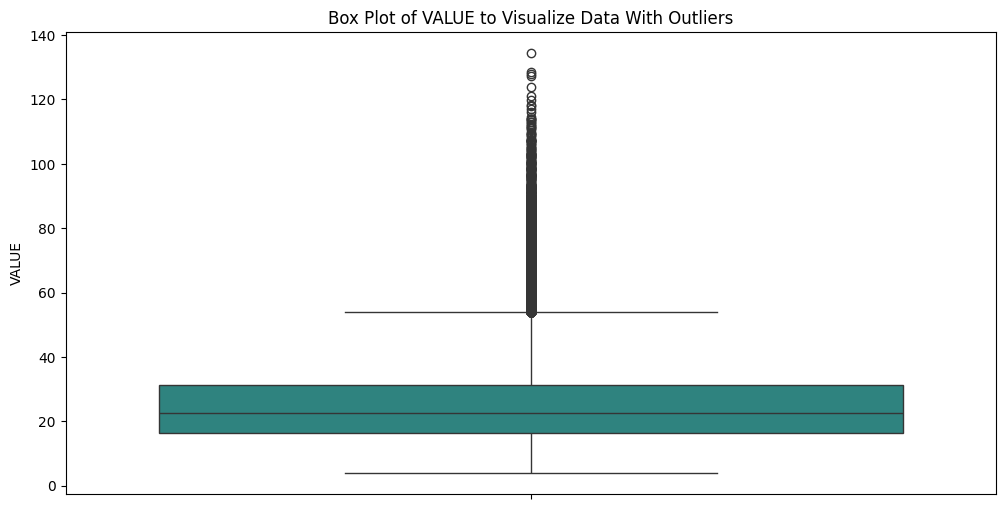

C:\Users\nesha\AppData\Local\Temp\ipykernel_21200\4225235963.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_wage_clean, y='VALUE', palette='viridis')


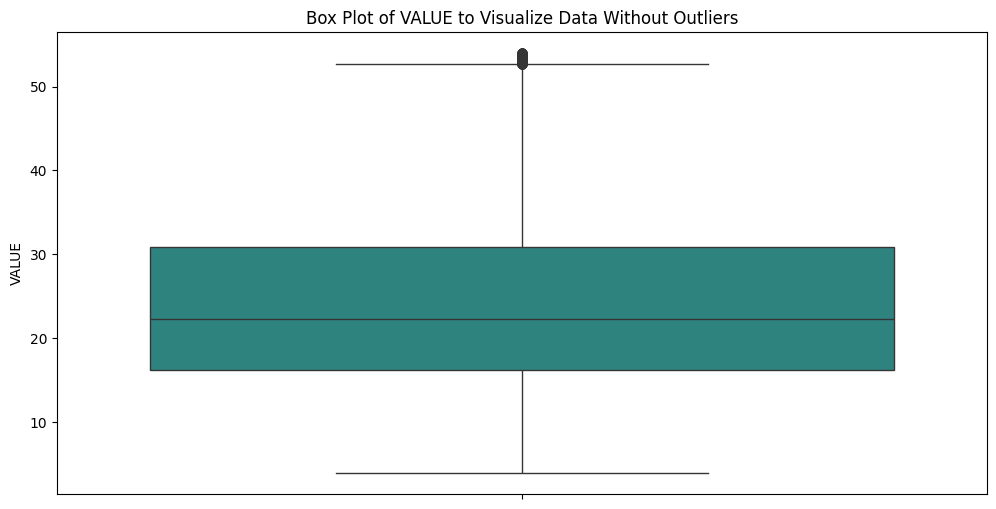

Data Shape Before Removing Outliers: (432707, 11)
Data Shape After Removing Outliers: (425582, 11)


In [4]:
# Create a separate DataFrame for rows with missing data for later assessment
data_missing = data_wage[data_wage.isnull().any(axis=1)]

# Remove rows with any missing/NA/NAN/NULL data from the working dataset
data_wage = data_wage.dropna()


# Visualize the outliers using a box plot before filtering
before_outliers = plt.figure(figsize=(12, 6))
sns.boxplot(data=data_wage, y='VALUE', palette='viridis')
plt.title('Box Plot of VALUE to Visualize Data With Outliers')
plt.show()

# Identifying and Correcting Anomalies/Outliers
Q1 = data_wage['VALUE'].quantile(0.25)
Q3 = data_wage['VALUE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
data_wage_clean = data_wage[(data_wage['VALUE'] >= lower_bound) & (data_wage['VALUE'] <= upper_bound)]

# Visualize the outliers using a box plot before filtering
after_outliers = plt.figure(figsize=(12, 6))
sns.boxplot(data=data_wage_clean, y='VALUE', palette='viridis')
plt.title('Box Plot of VALUE to Visualize Data Without Outliers')
plt.show()

# Print the shape of the dataset after removing outliers
print('Data Shape Before Removing Outliers:', data_wage.shape)
print('Data Shape After Removing Outliers:', data_wage_clean.shape)

In [5]:
# Calculate descriptive statistics for wages ('VALUE') by 'NOC' and 'REF_DATE'
wages_by_noc_ref_date = data_wage_clean.groupby(['NOC', 'REF_DATE'], observed=True)['VALUE'].describe()
print('Descriptive Statistics for Wages by NOC and REF_DATE:')
print(wages_by_noc_ref_date.head())

# Calculate descriptive statistics for wages ('VALUE') by 'NOC' and 'Age group'
wages_by_noc_age_group = data_wage_clean.groupby(['NOC', 'Age group'], observed=True)['VALUE'].describe()
print('\nDescriptive Statistics for Wages by NOC and Age Group:')
print(wages_by_noc_age_group.head())

# Calculate descriptive statistics for wages ('VALUE') by 'NOC' and 'Sex'
wages_by_noc_sex = data_wage_clean.groupby(['NOC', 'Sex'], observed=True)['VALUE'].describe()
print('\nDescriptive Statistics for Wages by NOC and Sex:')
print(wages_by_noc_sex.head())

# Calculate descriptive statistics for wages ('VALUE') by 'NOC' and 'GEO'
wages_by_noc_geo = data_wage_clean.groupby(['NOC', 'GEO'], observed=True)['VALUE'].describe()
print('\nDescriptive Statistics for Wages by NOC and Geographic Location:')
print(wages_by_noc_geo.head())

Descriptive Statistics for Wages by NOC and REF_DATE:
                count       mean       std    min      25%     50%      75%  \
NOC REF_DATE                                                                  
00  1997-01-01   14.0  26.035714  6.696118  12.40  21.8125  25.055  30.7350   
    1997-02-01   14.0  27.651429  5.603127  18.11  25.6600  28.005  31.3775   
    1997-03-01   16.0  27.213125  5.184649  16.46  24.7725  27.880  30.8350   
    1997-04-01   15.0  26.248667  4.433281  19.10  23.2100  26.120  29.4000   
    1997-05-01   15.0  26.570667  4.519844  19.39  23.2850  26.730  29.5800   

                  max  
NOC REF_DATE           
00  1997-01-01  36.59  
    1997-02-01  35.56  
    1997-03-01  34.24  
    1997-04-01  33.53  
    1997-05-01  35.58  

Descriptive Statistics for Wages by NOC and Age Group:
                                       count       mean       std    min  \
NOC                Age group                                               
00              

In [6]:
# Filter for the first month of every year
data_january = data_wage_clean[data_wage_clean['REF_DATE'].dt.month == 1]

# Calculate descriptive statistics for wages ('VALUE') by 'Age group' for January of each year
wages_by_age_group_january = data_january.groupby(['REF_DATE', 'Age group'], observed=True)['VALUE'].describe()
print('\nDescriptive Statistics for Wages by Age Group for January of Each Year:')
print(wages_by_age_group_january.head())

# Calculate descriptive statistics for wages ('VALUE') by 'Sex' for January of each year
wages_by_sex_january = data_january.groupby(['REF_DATE', 'Sex'], observed=True)['VALUE'].describe()
print('\nDescriptive Statistics for Wages by NOC and Sex:')
print(wages_by_sex_january.head())

# Calculate descriptive statistics for wages ('VALUE') by 'GEO' for January of each year
wages_by_geo_january = data_january.groupby(['REF_DATE', 'GEO'], observed=True)['VALUE'].describe()
print('\nDescriptive Statistics for Wages by NOC and Geographic Location:')
print(wages_by_geo_january.head())


Descriptive Statistics for Wages by Age Group for January of Each Year:
                              count       mean       std   min      25%  \
REF_DATE   Age group                                                      
1997-01-01 15 to 24 years     192.0   9.741667  2.217378  5.48   8.2575   
           25 to 54 years     718.0  17.359234  4.886991  5.36  13.6450   
           55 years and over  178.0  18.069607  6.864377  6.89  12.4200   
1998-01-01 15 to 24 years     189.0  10.034180  2.635503  5.75   8.2600   
           25 to 54 years     716.0  17.432863  4.719176  6.76  13.8900   

                                 50%      75%    max  
REF_DATE   Age group                                  
1997-01-01 15 to 24 years      9.375  10.8950  15.78  
           25 to 54 years     17.410  20.6550  34.95  
           55 years and over  16.535  22.6225  36.59  
1998-01-01 15 to 24 years      9.550  11.3700  21.48  
           25 to 54 years     17.420  20.8800  31.66  

Descriptive Sta